## Description
Jeu de données à 2 dimensions constitué de données normales et 1% de données anormales. Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. Ici, les données anormales sont plus proches des données normales mais et se ressemblent beaucoup.

Données normales :
- Données aléatoire uniforme
- X1 entre -10 et 10, X2 entre -7 et 7, size = 1500, distance euclidienne entre 2 et 7

Données anormales :
- Données aléatoire gaussienne
- mu = 0, sigma = 0.5, size = 15

Jeu de données à 2 dimensions constitué de données normales et 1% de données anormales. Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. Ici, les données anormales sont plus proches des données normales mais et se ressemblent beaucoup. \n Données normales : Données aléatoire uniforme, X1 entre -10 et 10, X2 entre -7 et 7, size = 1500, distance euclidienne entre 2 et 7 \n Données anormales : Données aléatoire gaussienne, mu = 0, sigma = 0.5, size = 15.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Paramètres de jeu de données

In [2]:
param_y_normal_data = 1
param_y_abnormal_data = 0
contamination = 1/100 # 1%
file_name = "synthetic_2D_data_"+str(datetime.now())
#full_file_path = str(datetime.now().date())+"/"+file_name+".csv"
full_file_path = file_name+".csv"

## Normal dataset generation

In [3]:
#Normal “continuous uniform” distribution dataset https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random_sample.html
mu = 0 #mean
sigma = 1 #Standard deviation
size = 1500 #number of samples
#n_dataset = np.random.normal(mu, sigma, size)
#n_dataset = np.random(mu, sigma, size)
y_n_dataset  = []
x1_n_dataset = []
x2_n_dataset = []
i = 0
while i<size:
    found = False
    while not found:
        #x1 = np.random.random(-6, 6)
        #x2 = np.random.random(-11, 11)
        x1 = (10--10) * np.random.random_sample() + -10
        x2 = (7--7) * np.random.random_sample() + -7
        distance = np.sqrt(x1**2 + x2**2)
        if 2 < distance < 7:
            found = True
    x1_n_dataset.append(x1)
    x2_n_dataset.append(x2)
    y_n_dataset.append(param_y_normal_data)
    i = i + 1
n_data_array = {'0': x1_n_dataset, '1':x2_n_dataset, 'is_normal': y_n_dataset}
n_dataset = pd.DataFrame(n_data_array, columns=['0', '1', 'is_normal'])
#n_dataset

## Abnormal gaussian dataset generation

In [4]:
#Abnormal gaussian dataset
mu_a = 0 #mean
sigma_a = 0.5 #Standard deviation
size_a = int(size*contamination) #size of samples
y_a_dataset  = []
x1_a_dataset = []
x2_a_dataset = []
i = 0
while i<size_a:
    y_a_dataset.append(param_y_abnormal_data)
    i = i + 1
x1_a_dataset = np.random.normal(mu_a, sigma_a, size_a)
x2_a_dataset = np.random.normal(mu_a, sigma_a, size_a)
a_data_array = {'0': x1_a_dataset, '1':x2_a_dataset, 'is_normal': y_a_dataset}
a_dataset = pd.DataFrame(a_data_array, columns=['0', '1', 'is_normal'])
#a_dataset

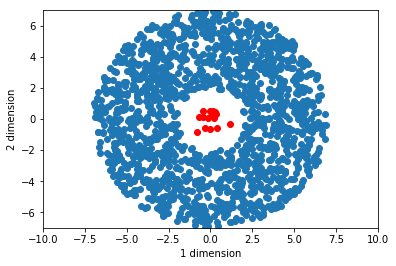

In [5]:
plt.scatter(a_dataset['0'], a_dataset['1'], c="r")
plt.scatter(n_dataset['0'], n_dataset['1'])
plt.xlim(-10.0,10.0)
plt.ylim(-7.,7.)
plt.xlabel('1 dimension')
plt.ylabel('2 dimension')
plt.show()

## Génération du jeu de données complet

In [6]:
dataset = pd.concat([n_dataset, a_dataset], ignore_index=True, sort=False)
dataset

,0,1,is_normal
0,5.358392,2.620379,1
1,-0.685970,2.990782,1
2,3.082029,-5.686140,1
3,3.166545,-0.325726,1
4,3.307295,-4.633933,1
5,-2.897139,-2.101446,1
6,-3.246641,3.720850,1
7,-6.702078,-0.822866,1
8,5.554390,-3.953190,1
9,4.636843,-5.025406,1


In [7]:
dataset.describe()

,0,1,is_normal
count,1515.000000,1515.000000,1515.000000
mean,-0.008991,0.094485,0.990099
std,3.567267,3.633663,0.099043
min,-6.921162,-6.990388,0.000000
25%,-3.000676,-2.933418,1.000000
50%,0.107826,0.110104,1.000000
75%,3.003665,3.155815,1.000000
max,6.916182,6.946129,1.000000


## Créé le fichier .csv du jeu de données

In [8]:
dataset.to_csv(full_file_path, index=None, header=True)